In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("FoodPrice_in_Turkey.csv", encoding = "ISO-8859-1")
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [3]:
product_names = list(df["ProductName"].unique())
print(product_names)

['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

In [4]:
df_rice =df.loc[(df.ProductName =="Rice - Retail") & (df.Year == 2019)]
print("So luong ban gi cua gao nam 2019: " + str(df_rice.shape[0]))

So luong ban gi cua gao nam 2019: 48


<AxesSubplot:>

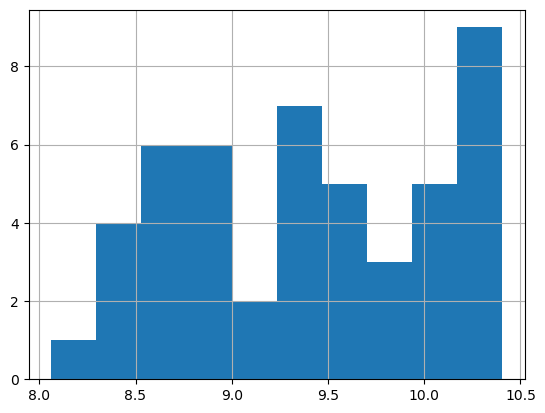

In [5]:
df_rice.Price.hist()

In [6]:
print(stats.ttest_1samp(df_rice.Price, 9.5))

Ttest_1sampResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567)


In [7]:
# powder in 2019

df_wheat = df.loc[(df.ProductName == "Wheat flour - Retail") & (df.Year == 2019)]
print(" Number of records of wheat flour in 2019: " + str(df_wheat.shape[0]))

 Number of records of wheat flour in 2019: 48


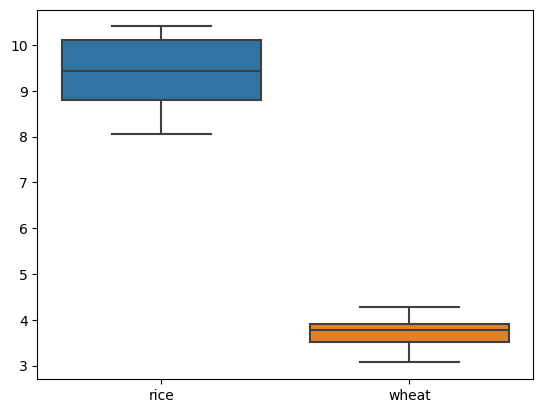

In [17]:
import seaborn as sns

price = {"rice": list(df_rice["Price"]), "wheat":list(df_wheat["Price"])}
df_price = pd.DataFrame(price)
sns.boxplot(data = df_price)
plt.show()

In [20]:
print(stats.ttest_ind(price["rice"], price["wheat"], equal_var = False))

Ttest_indResult(statistic=53.751692036304206, pvalue=7.110465285860583e-55)


In [21]:
# delete the unnecessary variances

del(df_rice, df_price, df_wheat, price)

In [22]:
# convert datetime data
df["time"] = pd.to_datetime(df["Year"].astype(str) + "/" + df["Month"].astype(str))

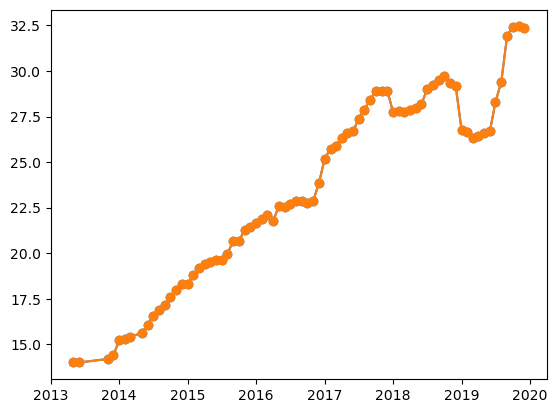

In [26]:
# calculating and visualize the coffee and tea prices as month
df_Tea_all = df.loc[(df.ProductName == "Tea - Retail")]
df_Tea_all_mean_by_month = df_Tea_all.groupby("time")["Price"].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle = "solid")

df_Coffee_all = df.loc[(df.ProductName == "Coffee - Retail")]
df_Coffee_all_mean_by_month = df_Tea_all.groupby("time")["Price"].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle = "solid")



In [30]:
# data preprocessing

# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place']= df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']

df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place','Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place','Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()


/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_4308/296712210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place']= df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


,time-place,Tea - Retail,Coffee - Retail
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


In [31]:
# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)